In [57]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text


In [58]:
fig_size = (6, 6)
font_size = 16

# Alzheimer

In [59]:
ae_classif = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='alzheimer classif values', index_col='model')
ae_metrics = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='alzheimer metrics values', index_col='model name')
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'Batch entropy'] = [(np.log(21) - x)/np.log(21) for x in ae_metrics.loc[:, 'Batch entropy']]
ae_metrics.loc[:, 'qc aPCC'] = [[1 - xx for xx in x] for x in ae_metrics.loc[:, 'qc aPCC']]
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

ae_classif = ae_classif.loc[['raw', 'robust', 'combat', 'AE-invTriplet', 'VAE-DANN', 'AE-invTriplet-KAN']]
ae_classif.index = ['raw', 'robust', 'combat', 'AE-invTriplet', 'VAE-DANN', 'AE-invTriplet-KAN']
ae_metrics = ae_metrics.loc[['raw', 'robust', 'combat', 'AE-invTriplet', 'VAE-DANN', 'AE-invTriplet-KAN']]
ae_metrics.index = ['raw', 'robust', 'combat', 'AE-invTriplet', 'VAE-DANN', 'AE-invTriplet-KAN']

ae_classif['model'] = ae_classif.index
ae_metrics['model'] = ae_metrics.index
model_names = ae_classif['model'].tolist()


In [60]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE":ae_metrics['Batch entropy'],
    "models": ae_metrics['model']
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model']
})
df_qc = pd.DataFrame({
    "qc_dist": ae_metrics['QC dist / total dist'],
    "models": ae_metrics['model']
})
df_apcc = pd.DataFrame({
    "qc_aPCC": ae_metrics['qc aPCC'],
    "models": ae_metrics['model'],
})

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        # np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        # np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        # np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models'])

df_qc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_qc.iloc[i]['qc_dist']).reshape([-1, 1]), 
        np.array([df_qc.iloc[i]['models']] * len(df_qc.iloc[i]['qc_dist'])).reshape([-1, 1]),
        # np.array([['qc_dist'] * len(df_qc.iloc[i]['qc_dist'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_qc.shape[0])
]), columns=['value', 'models'])

df_apcc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_apcc.iloc[i]['qc_aPCC']).reshape([-1, 1]), 
        np.array([df_apcc.iloc[i]['models']] * len(df_apcc.iloc[i]['qc_aPCC'])).reshape([-1, 1]),
        #np.array([['qc_aPCC'] * len(df_apcc.iloc[i]['qc_aPCC'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_apcc.shape[0])
]), columns=['value', 'models'])


# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    # "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    # "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    # "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['models']))]

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]

df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]
df_qc.loc[:, 'value'] = [float(x) for x in df_qc.loc[:, 'value']]
df_apcc.loc[:, 'value'] = [float(x) for x in df_apcc.loc[:, 'value']]

lolims = [True for _ in range(len(df_be['value']))]



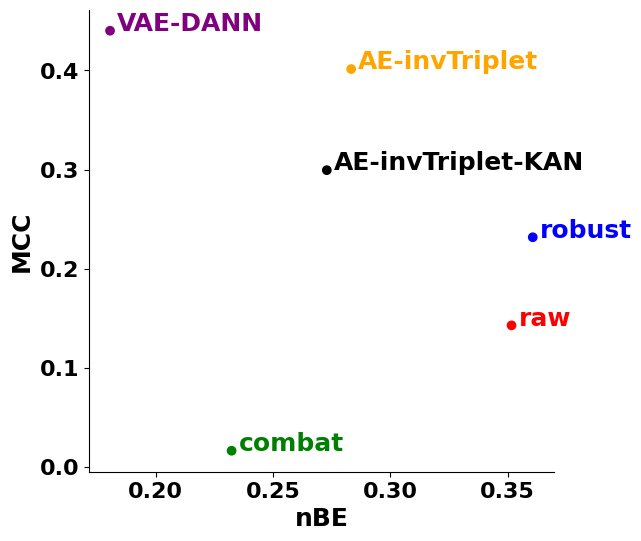

In [61]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array([
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "black"
])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nBE', fontsize=18, fontweight='bold')
ax.set_ylabel('MCC', fontsize=18, fontweight='bold')
ax.tick_params(axis='both', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i] + 0.003
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=6)
plt.show()

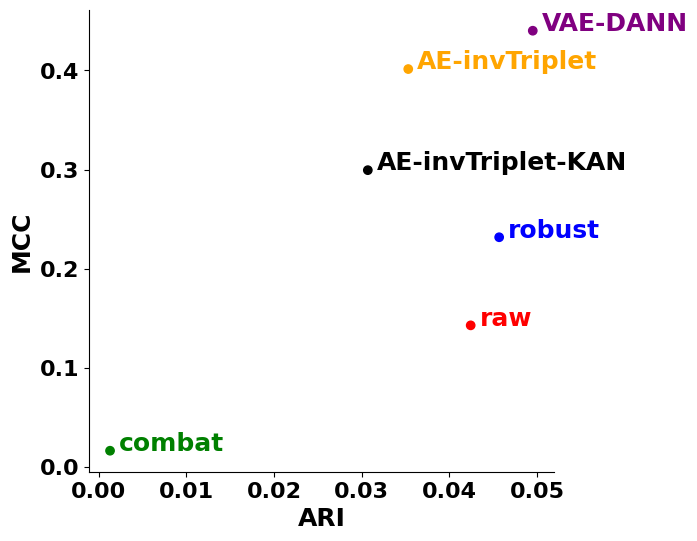

In [62]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array([
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "black"
])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('ARI', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i] + 0.001
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'normvae':
    #     y -= 0.0
    # if txt == 'VAE':
    #     y += 0.00
    # if txt == 'VAE-DANN':
    #     y -= 0.0
    #     x -= 0.0
    # if txt == 'raw':
    #     y += 0.00
    #     x += 0.00
    # if txt == 'minmax':
    #     y += 0.00
    # if txt == 'robust':
    #     y -= 0.0
    # if txt == 'minmax_per_batch':
    #     y += 0.00
    # if txt == 'waveica':
    #     y -= 0.0
    # if txt == 'pycombat':
    #     y += 0.0
    # if txt == 'standard':
    #     y -= 0.0
    # if txt == 'standard_per_batch':
    #     y -= 0.0
    # if txt == 'normae':
    #     y += 0.0
    #     x -= 0.0
    # if txt == 'AE-DANN':
    #     y += 0.0
    # if txt == 'AE-invTriplet':
    #     y -= 0.0
    # if txt == 'AE-revTriplet':
    #     y -= 0.0
    # if txt == 'VAE-invTriplet':
    #     y += 0.03
    #     x += 0.00
    # if txt == 'harmony':
    #     y += 0.00
    #     x += 0.00
    # if txt == 'VAE-revTriplet':
    #     y -= 0.01
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

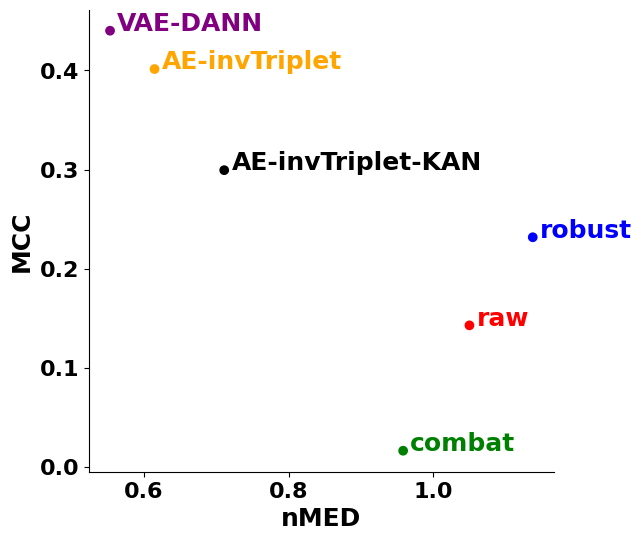

In [63]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array([
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "black"
])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_qc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nMED', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_qc.groupby(['models'], sort=False).mean().iloc[i] + 0.01
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'normvae':
    #     y -= 0.0
    # if txt == 'VAE':
    #     y += 0.00
    # if txt == 'VAE-DANN':
    #     y -= 0.02
    #     x -= 0.0
    # if txt == 'raw':
    #     y += 0.00
    #     x += 0.00
    # if txt == 'minmax':
    #     y += 0.00
    # if txt == 'robust':
    #     y -= 0.0
    # if txt == 'minmax_per_batch':
    #     y += 0.00
    # if txt == 'waveica':
    #     y -= 0.0
    # if txt == 'pycombat':
    #     y += 0.0
    # if txt == 'standard':
    #     y -= 0.0
    # if txt == 'standard_per_batch':
    #     y -= 0.0
    # if txt == 'normae':
    #     y += 0.0
    #     x -= 0.0
    # if txt == 'AE-invTriplet':
    #     y -= 0.0
    # if txt == 'AE-revTriplet':
    #     y -= 0.0
    # if txt == 'VAE-invTriplet':
    #     y += 0.03
    #     x += 0.00
    # if txt == 'harmony':
    #     y += 0.00
    #     x += 0.00
    # if txt == 'VAE-revTriplet':
    #     y -= 0.01
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

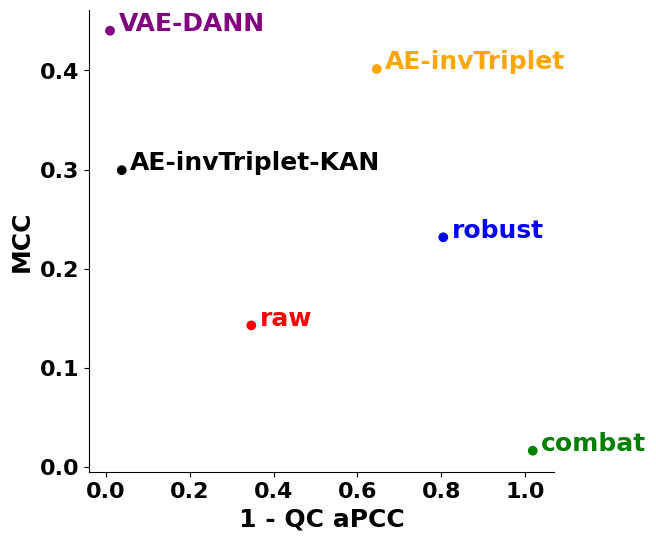

In [64]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array([
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "black"
])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_apcc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('1 - QC aPCC', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_apcc.groupby(['models'], sort=False).mean().iloc[i] + 0.02
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'normvae':
    #     y -= 0.0
    # if txt == 'VAE':
    #     y += 0.00
    # if txt == 'VAE-DANN':
    #     y -= 0.0
    #     x -= 0.0
    # if txt == 'raw':
    #     y += 0.00
    #     x += 0.00
    # if txt == 'minmax':
    #     y += 0.00
    # if txt == 'robust':
    #     y -= 0.0
    # if txt == 'minmax_per_batch':
    #     y += 0.00
    # if txt == 'waveica':
    #     y -= 0.0
    # if txt == 'pycombat':
    #     y += 0.0
    # if txt == 'standard':
    #     y -= 0.0
    # if txt == 'standard_per_batch':
    #     y -= 0.0
    # if txt == 'normae':
    #     y += 0.0
    #     x -= 0.0
    # if txt == 'AE-DANN':
    #     y += 0.0
    # if txt == 'AE-invTriplet':
    #     y -= 0.0
    # if txt == 'AE-revTriplet':
    #     y += 0.002
    # if txt == 'VAE-invTriplet':
    #     y += 0.03
    #     x += 0.00
    # if txt == 'harmony':
    #     y += 0.00
    #     x += 0.00
    # if txt == 'VAE-revTriplet':
    #     y -= 0.01
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

In [65]:
ae_metrics.drop(['model'], axis=1)
new_df = pd.concat((ae_classif.loc[:, 'valid/mcc'], ae_metrics.drop(['model'], axis=1)), axis=1)
# make apply to make all string arrays into arrays then mean

new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
new_df.to_csv('../logs/table_alz_supp.csv')

# Amide

In [66]:
ae_classif = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='amide classif values', index_col='model')
ae_metrics = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='amide metrics values', index_col='Unnamed: 0')
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'BE'] = [(np.log(3) - x)/np.log(3) for x in ae_metrics.loc[:, 'BE']]
ae_metrics.loc[:, 'qc_aPCC'] = [[1 - xx for xx in x] for x in ae_metrics.loc[:, 'qc_aPCC']]
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

ae_classif = ae_classif.loc[['raw', 'robust', 'combat', 
                             'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']]
ae_classif.index = ['raw', 'robust', 'combat', 
                    'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']
ae_metrics = ae_metrics.loc[['raw', 'robust', 'combat', 
                             'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']]
ae_metrics.index = ['raw', 'robust', 'combat', 
                    'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']

ae_classif['model'] = ae_classif.index
ae_metrics['model'] = ae_metrics.index
model_names = ae_classif['model'].tolist()


In [67]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE":ae_metrics['BE'],
    "models": ae_metrics['model']
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model']
})
df_qc = pd.DataFrame({
    "qc_dist": ae_metrics['qc_dist/total_dist'],
    "models": ae_metrics['model']
})
df_apcc = pd.DataFrame({
    "qc_aPCC": ae_metrics['qc_aPCC'],
    "models": ae_metrics['model'],
})

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        # np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        # np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        # np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models'])

df_qc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_qc.iloc[i]['qc_dist']).reshape([-1, 1]), 
        np.array([df_qc.iloc[i]['models']] * len(df_qc.iloc[i]['qc_dist'])).reshape([-1, 1]),
        # np.array([['qc_dist'] * len(df_qc.iloc[i]['qc_dist'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_qc.shape[0])
]), columns=['value', 'models'])

df_apcc = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_apcc.iloc[i]['qc_aPCC']).reshape([-1, 1]), 
        np.array([df_apcc.iloc[i]['models']] * len(df_apcc.iloc[i]['qc_aPCC'])).reshape([-1, 1]),
        #np.array([['qc_aPCC'] * len(df_apcc.iloc[i]['qc_aPCC'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_apcc.shape[0])
]), columns=['value', 'models'])


# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    # "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    # "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    # "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['models']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        # np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        # np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        # np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]

df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]
df_qc.loc[:, 'value'] = [float(x) for x in df_qc.loc[:, 'value']]
df_apcc.loc[:, 'value'] = [float(x) for x in df_apcc.loc[:, 'value']]

lolims = [True for _ in range(len(df_be['value']))]



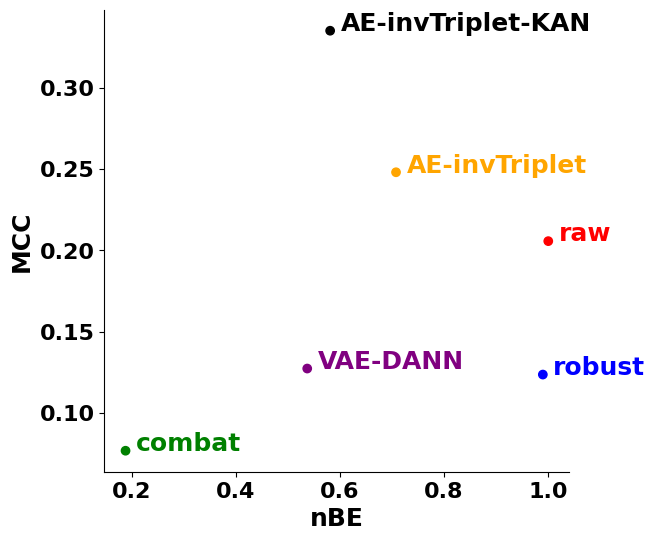

In [68]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array([
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "black"
])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nBE', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i] + 0.02
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'raw':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'harmony':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'robust':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'AE-DANN':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'normae':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'robust_per_batch':
    #     y += 0.006
    #     x -= 0.006
    # elif txt == 'standard':
    #     y -= 0.004
    # elif txt == 'AE-revTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'VAE-invTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'AE':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'AE-invTriplet':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'combat':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'waveica':
    #     y -= 0.005
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

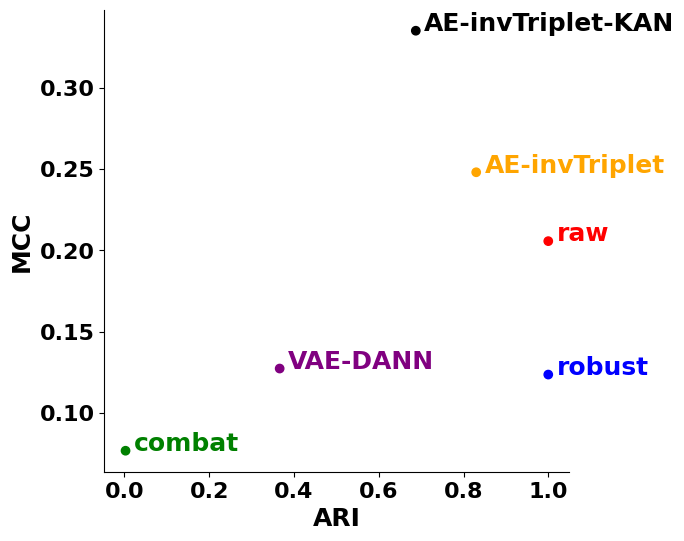

In [69]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red", "blue", "green", "orange", "purple", "black" ])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('ARI', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i] + 0.02
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'raw':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'harmony':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'robust':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'AE-DANN':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'normae':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'robust_per_batch':
    #     y += 0.006
    #     x -= 0.006
    # elif txt == 'standard':
    #     y -= 0.004
    # elif txt == 'AE-revTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'VAE-invTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'AE':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'AE-invTriplet':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'combat':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'waveica':
    #     y -= 0.005
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

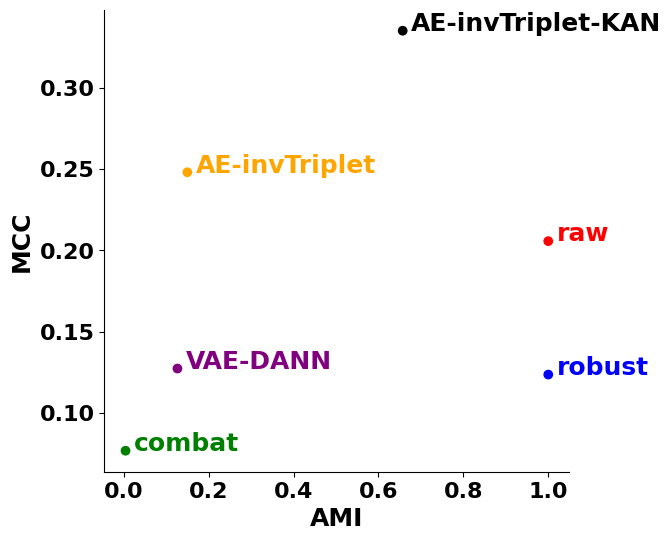

In [70]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red", "blue", "green", "orange", "purple", "black" ])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_ami.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('AMI', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_ami.groupby(['models'], sort=False).mean().iloc[i] + 0.02
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'raw':
    #     y += 0.003
    #     x -= 0.01
    # if txt == 'harmony':
    #     y += 0.003
    #     x -= 0.01
    # if txt == 'robust':
    #     y += 0.003
    #     x -= 0.01
    # if txt == 'AE-DANN':
    #     y += 0.003
    #     x -= 0.01
    # if txt == 'normae':
    #     y += 0.003
    #     x -= 0.01
    # if txt == 'robust_per_batch':
    #     y += 0.003
    #     x -= 0.01
    # elif txt == 'standard':
    #     y += 0.003
    #     x -= 0.01
    # elif txt == 'AE-revTriplet':
    #     y += 0.003
    #     x -= 0.01
    # elif txt == 'VAE-invTriplet':
    #     y += 0.003
    #     x -= 0.01
    # elif txt == 'AE':
    #     y += 0.003
    #     x -= 0.01
    # elif txt == 'AE-invTriplet':
    #     y += 0.003
    #     x -= 0.01
    # elif txt == 'combat':
    #     y += 0.003
    #     x -= 0.01
    # elif txt == 'waveica':
    #     y += 0.003
    #     x -= 0.01
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

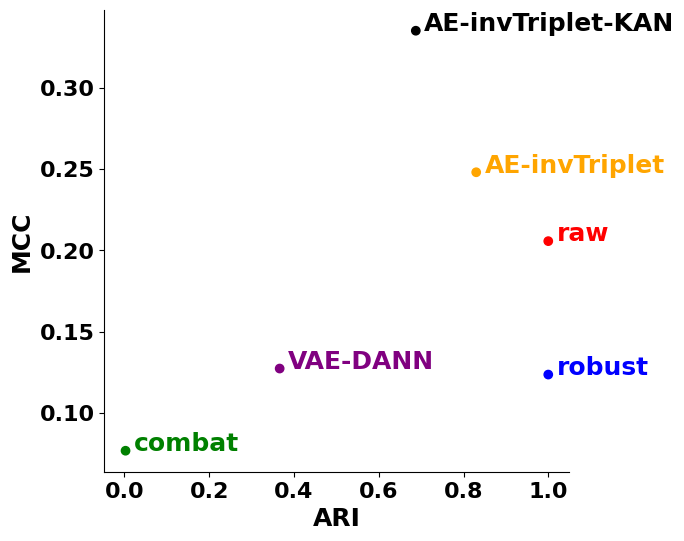

In [71]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red", "blue", "green", "orange", "purple", "black" ])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('ARI', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i] + 0.02
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'raw':
    #     y += 0.006
    #     x -= 0.006
    # elif txt == 'standard':
    #     y -= 0.004
    # elif txt == 'AE-revTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'AE-invTriplet':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'robust':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'robust_per_batch':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'normae':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'combat':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'AE-DANN':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'VAE-DANN':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'VAE-invTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'AE':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'waveica':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'harmony':
    #     y += 0.005
    #     x += 0.001
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

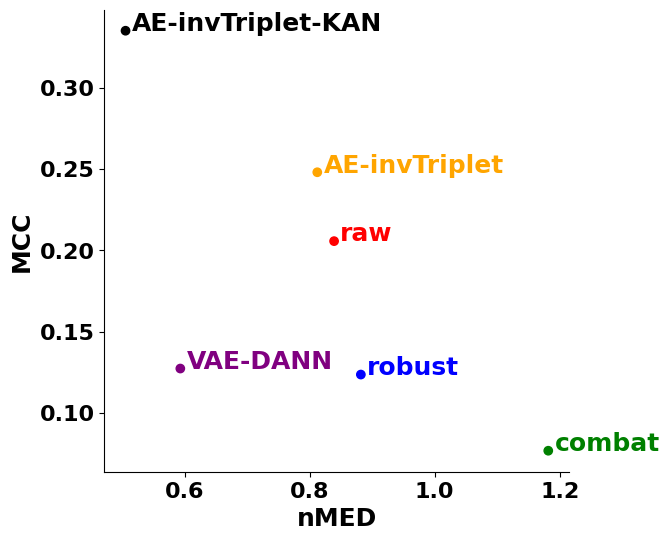

In [72]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red", "blue", "green", "orange", "purple", "black" ])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_qc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nMED', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_qc.groupby(['models'], sort=False).mean().iloc[i] + 0.01
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'raw':
    #     y += 0.006
    #     x -= 0.006
    # elif txt == 'standard':
    #     y -= 0.004
    # elif txt == 'AE-revTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'AE-invTriplet':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'robust':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'robust_per_batch':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'normae':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'combat':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'AE-DANN':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'VAE-DANN':
    #     y += 0.005
    #     x += 0.001
    # elif txt == 'VAE-invTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'AE':
    #     y += 0.004
    #     x -= 0.004
    # elif txt == 'waveica':
    #     y -= 0.008
    #     x -= 0.001
    # elif txt == 'harmony':
    #     y += 0.005
    #     x += 0.001
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

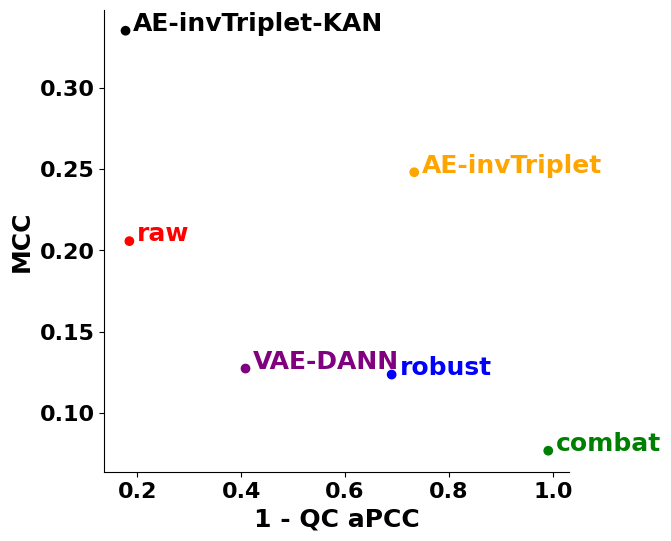

In [73]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red", "blue", "green", "orange", "purple", "black" ])
fig, ax = plt.subplots(figsize=fig_size)

ax.scatter(df_apcc.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('1 - QC aPCC', fontsize=18, weight='bold')
ax.set_ylabel('MCC', fontsize=18, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, txt in enumerate(ae_metrics['model']):
    x = df_apcc.groupby(['models'], sort=False).mean().iloc[i] + 0.015
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'AE-invTriplet':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'harmony':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'robust':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'combat':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'standard':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'waveica':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'robust_per_batch':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'raw':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'normae':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'AE-DANN':
    #     y += 0.006
    #     x -= 0.006
    # if txt == 'VAE-DANN':
    #     y += 0.006
    #     x -= 0.006
    # elif txt == 'standard':
    #     y -= 0.004
    # elif txt == 'AE-revTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'VAE-invTriplet':
    #     y -= 0.014
    #     x -= 0.004
    # elif txt == 'AE':
    #     y += 0.004
    #     x -= 0.004
    ax.annotate(txt, (x, y), color=colors[i], fontsize=18, fontweight='bold')
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

In [74]:
ae_metrics.drop(['model'], axis=1)
new_df = pd.concat((ae_classif.loc[:, 'valid/mcc'], ae_metrics.drop(['model'], axis=1)), axis=1)
# make apply to make all string arrays into arrays then mean

new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
new_df.to_csv('../logs/table_amide_supp.csv')

# Mice

In [75]:
ae_classif = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='mice classif values', index_col='Unnamed: 0')
ae_metrics = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='mice metrics values', index_col='Unnamed: 0')
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'BE'] = [(np.log(7) - x)/np.log(7) for x in ae_metrics.loc[:, 'BE']]
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

ae_classif = ae_classif.loc[['raw', 'robust', 'combat', 'AE-invTriplet', 'vaedann', 'VAE-invTriplet']]
ae_classif.index = ['raw', 'robust', 'combat',  'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']
ae_metrics = ae_metrics.loc[['raw', 'robust', 'combat',  'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
ae_metrics.index = ['raw', 'robust', 'combat',  'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']

ae_classif['model'] = ae_classif.index
ae_metrics['model'] = ae_metrics.index
model_names = ae_classif['model'].tolist()


In [76]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE": ae_metrics['BE'],
    "models": ae_metrics['model'],
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model']
})

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        # np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        # np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        # np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models'])


# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    # "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    # "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    # "group": ['test' for _ in range(len(ae_classif['model']))]
})


df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]

df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]




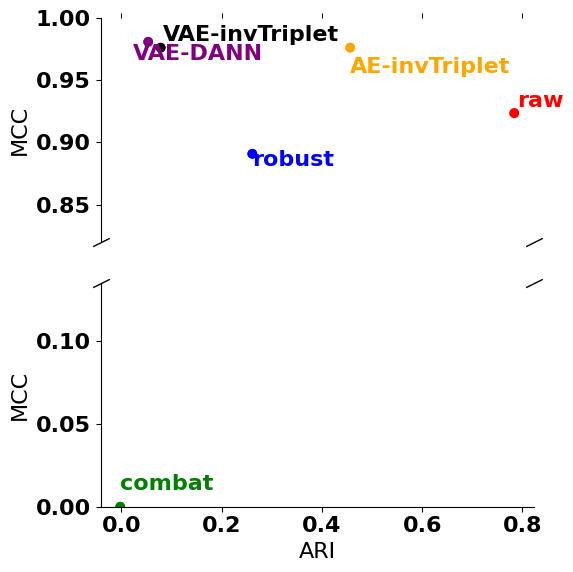

In [77]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red", "blue", "green", "orange", "purple", "black" ])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=fig_size)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax1.set_ylabel('MCC')
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'normvae':
        y -= 0.015
    if txt == 'VAE':
        y += 0.00
    if txt == 'VAE-DANN':
        y -= 0.015
        x -= 0.03
    if txt == 'raw':
        y += 0.005
        x += 0.005
    if txt == 'minmax':
        y += 0.0015
    if txt == 'robust':
        y -= 0.01
    if txt == 'minmax_per_batch':
        y += 0.001
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.01
    if txt == 'normae':
        y += 0.01
        x -= 0.05
    if txt == 'AE-DANN':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.02
    if txt == 'AE-revTriplet':
        y -= 0.015
    if txt == 'VAE-invTriplet':
        y += 0.005
        x += 0.005
    if txt == 'harmony':
        y += 0.005
        x += 0.005
    if txt == 'VAE-revTriplet':
        y -= 0.01
    ax1.annotate(txt, (x, y), color=colors[i])
ax2.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.set_xlabel('ARI')
ax2.set_ylabel('MCC')
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'normvae':
        y -= 0.02
    if txt == 'VAE':
        y += 0.001
    if txt == 'raw':
        y -= 0.01
    if txt == 'minmax':
        y += 0.015
    if txt == 'robust':
        y -= 0.01
    if txt == 'minmax_per_batch':
        y += 0.01
    if txt == 'waveica':
        y -= 0.01
    if txt == 'pycombat':
        y += 0.01
    if txt == 'standard':
        y -= 0.01
    if txt == 'standard_per_batch':
        y -= 0.01
    if txt == 'normae':
        y += 0.01
    if txt == 'AE-invTriplet':
        y -= 0.01
    if txt == 'AE-revTriplet':
        y -= 0.02
    if txt == 'VAE-invTriplet':
        y += 0.01
    if txt == 'combat':
        y += 0.01
    if txt == 'VAE-DANN':
        y += 0.1
        # x -= 0.1
    ax2.annotate(txt, (x, y), color=colors[i])
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.tight_layout()
plt.show()

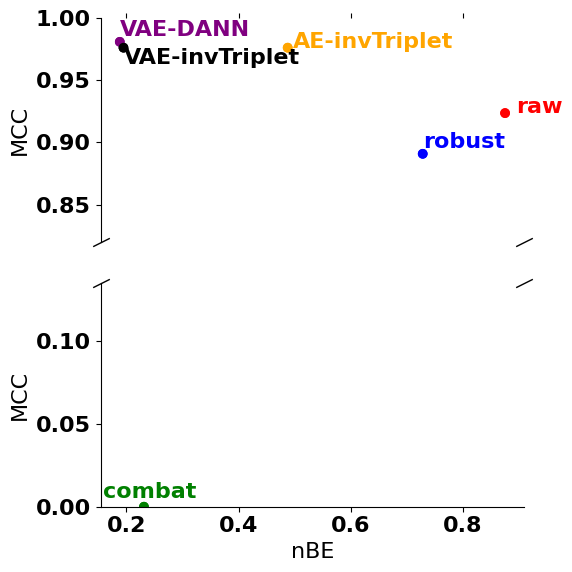

In [78]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array(["red", "blue", "green", "orange", "purple", "black" ])
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=fig_size)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.82, 1.)  # outliers only
ax2.set_ylim(0, .135)  # most of the data

ax1.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax1.set_ylabel('MCC')
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'normvae':
        y += 0.05
    if txt == 'VAE':
        y += 0.005
    if txt == 'VAE-DANN':
        y += 0.005
        x -= 0.0
    if txt == 'raw':
        y += 0.00
        x += 0.02
    if txt == 'minmax':
        y += 0.00
    if txt == 'robust':
        y += 0.005
    if txt == 'minmax_per_batch':
        y += 0.005
    if txt == 'robust_per_batch':
        y += 0.005
    if txt == 'waveica':
        y += 0.005
    if txt == 'pycombat':
        y += 0.005
    if txt == 'standard':
        y += 0.005
    if txt == 'standard_per_batch':
        y += 0.005
    if txt == 'normae':
        y += 0.008
        x -= 0.0
    if txt == 'AE-DANN':
        y -= 0.02
        x += 0.005
    if txt == 'waveica':
        y += 0.002
        x -= 0.08
    if txt == 'AE-invTriplet':
        y -= 0.0
        x += 0.01
    if txt == 'AE-revTriplet':
        y -= 0.0
    if txt == 'VAE-invTriplet':
        y -= 0.013
        x += 0.00
    if txt == 'combat':
        y += 0.005
    if txt == 'harmony':
        y += 0.005
        x += 0.00
    if txt == 'VAE-revTriplet':
        y += 0.005
    ax1.annotate(txt, (x, y), color=colors[i])
ax2.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), 
           c=colors)
ax2.set_xlabel('nBE')
ax2.set_ylabel('MCC')
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i]
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    if txt == 'normvae':
        y -= 0.0
    if txt == 'VAE':
        y += 0.00
    if txt == 'raw':
        y -= 0.0
    if txt == 'minmax':
        y += 0.0
    if txt == 'robust':
        y -= 0.0
    if txt == 'minmax_per_batch':
        y += 0.0
    if txt == 'waveica':
        y -= 0.0
    if txt == 'pycombat':
        y += 0.0
    if txt == 'standard':
        y -= 0.0
    if txt == 'standard_per_batch':
        y -= 0.0
    if txt == 'normae':
        y += 0.0
    if txt == 'AE-invTriplet':
        y -= 0.0
    if txt == 'AE-revTriplet':
        y -= 0.0
    if txt == 'VAE-invTriplet':
        y -= 0.1
    if txt == 'combat':
        y += 0.005
        x += 0.16
    if txt == 'harmony':
        y += 0.005
        x += 0.00
    if txt == 'VAE-DANN':
        y += 0.
        # x -= 0.1
    ax2.annotate(txt, (x, y), color=colors[i])
font = {
        'weight' : 'bold',
        'size'   : font_size}

matplotlib.rc('font', **font)

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.tight_layout()
plt.show()

In [79]:
ae_metrics.drop(['model'], axis=1)
new_df = pd.concat((ae_classif.loc[:, 'valid/mcc'], ae_metrics.drop(['model'], axis=1)), axis=1)
# make apply to make all string arrays into arrays then mean

new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
new_df.to_csv('../logs/table_mice_supp.csv')

# Benchmark

In [80]:
ae_classif = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='benchmark classif values', index_col='model')
ae_metrics = pd.read_excel('metrics_bernn_wkan.xlsx', sheet_name='Benchmark metrics values', index_col='model')
ae_metrics.iloc[:] = ae_metrics.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_metrics.loc[:, 'Batch entropy'] = [(np.log(7) - x)/np.log(7) for x in ae_metrics.loc[:, 'Batch entropy']]
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

ae_classif = ae_classif.loc[['raw', 'robust', 'combat', 
                             'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']]
ae_classif.index = ['raw', 'robust', 'combat', 
                    'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']
ae_metrics = ae_metrics.loc[['raw', 'robust', 'combat', 
                             'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']]
ae_metrics.index = ['raw', 'robust', 'combat', 
                    'AE-invTriplet', 'VAE-DANN',  'AE-invTriplet-KAN']

ae_classif['model'] = ae_classif.index
ae_metrics['model'] = ae_metrics.index
model_names = ae_classif['model'].tolist()


In [81]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df_be = pd.DataFrame({
    "nBE": ae_metrics['Batch entropy'],
    "models": ae_metrics['model'],
})
df_ari = pd.DataFrame({
    "ARI": ae_metrics['ARI'],
    "models": ae_metrics['model']
})
df_ami = pd.DataFrame({
    "AMI": ae_metrics['AMI'],
    "models": ae_metrics['model']
})

df_be = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_be.iloc[i]['nBE']).reshape([-1, 1]), 
        np.array([df_be.iloc[i]['models']] * len(df_be.iloc[i]['nBE'])).reshape([-1, 1]),
        # np.array([['nBE'] * len(df_be.iloc[i]['nBE'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_be.shape[0])
]), columns=['value', 'models'])

df_ari = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ari.iloc[i]['ARI']).reshape([-1, 1]), 
        np.array([df_ari.iloc[i]['models']] * len(df_ari.iloc[i]['ARI'])).reshape([-1, 1]),
        # np.array([['ARI'] * len(df_ari.iloc[i]['ARI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ari.shape[0])
]), columns=['value', 'models'])
df_ami = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_ami.iloc[i]['AMI']).reshape([-1, 1]), 
        np.array([df_ami.iloc[i]['models']] * len(df_ami.iloc[i]['AMI'])).reshape([-1, 1]),
        # np.array([['AMI'] * len(df_ami.iloc[i]['AMI'])]).reshape([-1, 1]),
    ), 1)
    for i in range(df_ami.shape[0])
]), columns=['value', 'models'])


# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    # "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    # "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    # "group": ['test' for _ in range(len(ae_classif['model']))]
})


df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        # np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]

df_be.loc[:, 'value'] = [float(x) for x in df_be.loc[:, 'value']]
df_ari.loc[:, 'value'] = [float(x) for x in df_ari.loc[:, 'value']]
df_ami.loc[:, 'value'] = [float(x) for x in df_ami.loc[:, 'value']]




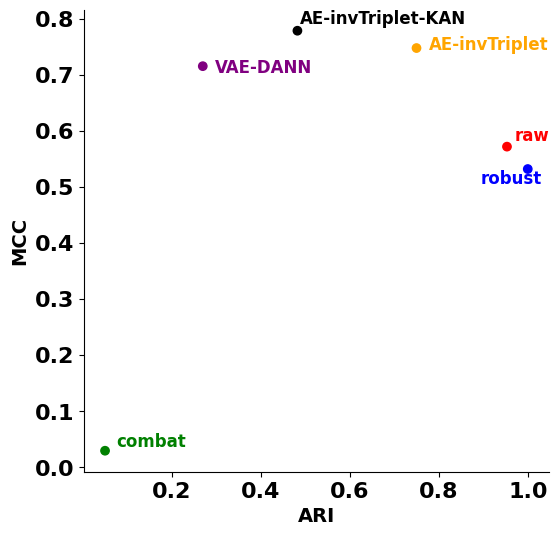

In [82]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array([
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "black"
])
fig, ax = plt.subplots(figsize=fig_size)

plt.scatter(df_ari.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('ARI', fontsize=14, weight='bold')
ax.set_ylabel('MCC', fontsize=14, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_ari.groupby(['models'], sort=False).mean().iloc[i] + 0.02
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'raw':
    #     y += 0.006
    #     x -= 0.006
    #elif txt == 'standard':
    #    y -= 0.004
    #elif txt == 'AE-revTriplet':
    #    y -= 0.014
    #    x -= 0.004
    # elif txt == 'VAE-invTriplet':
    #     y += 0.05
        # x -= 0.004
    #elif txt == 'AE':
    #    y += 0.004
    #    x -= 0.004
    #elif txt == 'waveica':
    #    y -= 0.004
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)
font = {'size'   : font_size}

matplotlib.rc('font', **font)

plt.show()

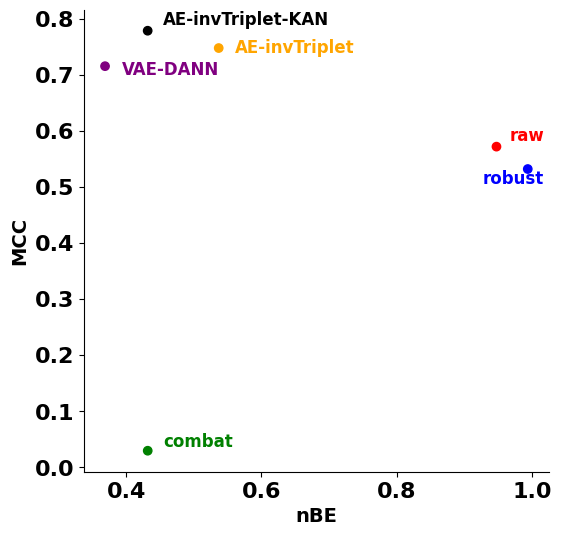

In [83]:
N = len(ae_metrics['model'])
width = 0.16
ind = np.arange(N)

colors = np.array([
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "black"
])
fig, ax = plt.subplots(figsize=fig_size)

plt.scatter(df_be.groupby(['models'], sort=False).mean(), df_valid.groupby(['models'], sort=False).mean(), c=colors)
ax.set_xlabel('nBE', fontsize=14, weight='bold')
ax.set_ylabel('MCC', fontsize=14, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
texts = []
for i, txt in enumerate(ae_metrics['model']):
    x = df_be.groupby(['models'], sort=False).mean().iloc[i] + 0.02
    y = df_valid.groupby(['models'], sort=False).mean().iloc[i]
    # if txt == 'raw':
    #     y += 0.04
    #     x += 0.015
    # if txt == 'minmax':
    #     y += 0.08
    #     x += 0.06
    # elif txt == 'minmax_per_batch':
    #     y += 0.1
    #     x -= 0.15
    # if txt == 'AE-invTriplet':
        # y += 0.05
    #     x += 0.001
    # elif txt == 'VAE-DANN':
    #     # y -= 0.014
    #     x -= 0.1
    # elif txt == 'AE-DANN':
    #     y -= 0.014
    #     # x -= 0.1
    # if txt == 'VAE-invTriplet':
    #     # y -= 0.014
    #     x += 0.015
    # # elif txt == 'normvae':
    # #     y += 0.09
    # #     # x -= 0.05
    # elif txt == 'normae':
    #     y += 0.03
    #     # x -= 0.05
    # elif txt == 'VAE':
    #     y -= 0.01
    # elif txt == 'AE':
    #     # x -= 0.01
    #     y -= 0.008
    # ax.annotate(txt, (x, y), color=colors[i])
    texts += [plt.text(x.iloc[0], y.iloc[0], txt, color=colors[i], fontsize=12)]
adjust_text(texts)



font = {'size'   : font_size}

matplotlib.rc('font', **font)
    
plt.show()

In [84]:
ae_metrics.drop(['model'], axis=1)
new_df = pd.concat((ae_classif.loc[:, 'valid/mcc'], ae_metrics.drop(['model'], axis=1)), axis=1)
# make apply to make all string arrays into arrays then mean

new_df = new_df.applymap(lambda x: np.mean(ast.literal_eval(x)) if isinstance(x, str) else np.mean(x))
new_df.to_csv('../logs/table_mice_supp.csv')